# K-means

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

## First Question

Show two centroids given this dataset and the Voronoi tesselation

In [ ]:
train_dataset = np.array(
    [[ -3,  4],
     [2 ,  0],
     [4,  -4],
     [4,  3],
     [0,  2],
     [2,  1],
     [1,  -1],
     [5,  3]])

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(train_dataset)

In [ ]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 3.        ,  0.33333333],
       [-1.5       ,  3.        ]])

### Voronoi Tessellation

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=8)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

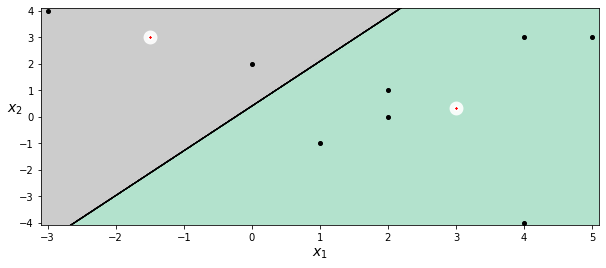

In [ ]:
plt.figure(figsize=(10, 4))
plot_decision_boundaries(kmeans, train_dataset)
plt.show()

## Second Question
An alternative solution for large train dataset that can be allocated directly on RAM memory due restrictions of the problem or infrastructure

In [ ]:
DATASET_ROOT_PATH = './datasets/k_means_homework/'

TRAIN_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_train.txt')
TEST_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_test.txt')

## Remove useless features
X = np.loadtxt(TRAIN_PATH, delimiter=',')

X_0 = np.delete(X, np.s_[3:], axis=0)
X_1 = np.delete(X, np.s_[:3], axis=0) 

X_0 = np.delete(X_0, np.s_[2:], axis=1)
X_1 = np.delete(X_1, np.s_[2:], axis=1)  

print(f'X_0 = {X_0}')
print()
print(f'X_1 = {X_1}')


X_0 = [[ 0.e+00 -4.e+00]
 [-1.e+03  2.e+00]
 [ 3.e+03  3.e+00]]

X_1 = [[-5.e+03 -6.e+00]
 [-4.e+03 -5.e+00]
 [-2.e+03 -2.e+00]]


In [ ]:

sum_0, sum_1 = 0, 0

# mean for first centroid
for i in range(len(X_0)):
    sum_0 += X_0[i][0] 
    sum_1 += X_0[i][1] 

centroid_0 = [sum_0/len(X_0), sum_1/len(X_0)]

sum_0, sum_1 = 0, 0

# mean for sencond centroid
for i in range(len(X_1)):
    sum_0 += X_1[i][0] 
    sum_1 += X_1[i][1] 

centroid_1 = [sum_0/len(X_0), sum_1/len(X_0)]    

# Inserting the previous label for each vector
centroid_0.append(0)
centroid_1.append(1)

print(f'centroid_0: {centroid_0}')
print(f'centroid_1: {centroid_1}')



centroid_0: [666.6666666666666, 0.3333333333333333, 0]
centroid_1: [-3666.6666666666665, -4.333333333333333, 1]


## Classifing the Test Dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
train_dataset = np.array([centroid_0, centroid_1])
test_dataset = np.loadtxt(TEST_PATH, delimiter=',')

# Split the dataset 
X_train, X_test = np.delete(train_dataset, np.s_[2:], axis=1), np.delete(test_dataset, np.s_[2:], axis=1)
y_train, y_test = np.delete(train_dataset, np.s_[:-1], axis=1), np.delete(test_dataset, np.s_[:-1], axis=1)

# Transform the array in column vectors
y_train = np.ravel(y_train,order='C')
y_test = np.ravel(y_test,order='C')

scaler = MinMaxScaler()
model = scaler.fit(X_train)
X_train_scaled = model.transform(X_train)
X_test_scaled = model.transform(X_test)

clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_train_scaled, y_train)
result = clf.predict(X_test_scaled)

print(f'Label: {y_test}')
print(f'Predict: {result}')

Label: [0. 0. 1. 1.]
Predict: [0. 0. 1. 1.]


## Third Question

A little talk about K-means, K-means++ and K-medoids

This algorithm was proposed by Stuart Lloyd in 1957. The first application was associated to vector quantization in signal processing, more precisely as PCM(pulse-code modulation) technique. 

Now, about K-medoids, it's an algorithm whose is very similar to k-means and k-means++ approach, once the purpose of k-medoids is clustering and, hence, labeling data of unlabel dataset. In this way, an approach to explain the operation of k-medoid model is understading, before, how these similar models works, because, k-medoid using them as sub-routine in its operation.

Therefore, is can be possible explain these model breaks apart each algorithms in three methods: 

- Initialization
- Assignment
- Updation 

Thereby:

### $k$-means Operation
The K-means operation is known to using Lloyd algorithm to clustering some unlabel dataset. So, the first thing that Lloyd algorithm is define the $K$ centroid of the clusters. This definition is the major feature of this algorithm, that is, a **random initialization**. Hence, given a dataset with $n$ instances, the Lloyd algol will choice randomically $K$ instances to represent the firsts centroid of each cluster. 

Chosen the centroids, the algorithm will be labeling each instance based in the distance between this instance and each centroid cluster. That instance will receive the label of cluster that represents the less distance to itself. Naturally, the way of this distance will be evaluated depending of the problem.

Lastly, as the K-means is a iterative model, it's necessary update the centroid to find the optimal soluation of the problem. Naturally, this optimal not necessarilly will be a global optimal, being able, therefore, just a local optimal.

Hence, to choose the new centroid for next iteration, the mean between the instances of each cluster will be evaluated and this midpoint will be the new centroid of your cluster. And so on, the process will be repeated until reaching to an optimal solution, local or global.

### $k$-means++ Operation
K-means++ represents an improvent of Lloyd's Algorithm purpose by David Artur and Sergei Vassilvitskii in an paper called "k-means: The Advantages of Careful Seeding". in this related work, the authors discuss an enhance about the initialization process purpose to solve an old problem of k-means initialization, that is, the generation of _poor cluster_ due a bad choice of centroids in this process. By the way, in this context, poor cluster means a horrible clustering of your dataset, like a graphic comparative in the next:

<img src="https://raw.githubusercontent.com/Euronym/computational_intelligence_2022/main/images/poor_cluster.png" width="300" height="300" />
<img src="https://raw.githubusercontent.com/Euronym/computational_intelligence_2022/main/images/ideal_cluster.png" width="300" height="300" />

Hence, to solve this problem and avoid bad clustering, the authors purpose a sub-routine to choice the best centroid in the dataset and reach the ideal clustering. To this purpose the following algorithm is used:

- Choose a instance randomically from the dataset for being your first centroid;
- Compute a distance $D(x)$ for each $x$ point in the dataset to this centroid. Like always, this distance depend of your problem;
- Choose the next centroid based in the beside probability: $\dfrac{D(x')^2}{\sum_{x \in \chi}D(x)^2}$
- Repeat this process until reach in the $K$ cluster defined.

In the matter of fact, this process garantuees that chosen centroids will be distant to each other, due fact the probability is proportional to a distance between a centroid and the next centroid cluster.

Lastly, once done this initialization, the k-means++ model operate similarly to k-means. 


### $k$-medoid Operation
Considering the explanation of above model, it's more simple to understading how operate the PAM(Partitioning Around Medoids) algorithm in K-medoid. So, it model use the same method of k-means++ to iniatialize your centroid. Furthermore, use the same of k-means to assign the label in the data of the problem. Hence, the diference be in the **update process**. 

Now, before explain how the updation process works in k-medoid, it's interesting discuss the reasons to this modification and, in this way, the major reason is the purpose to avoid the possible negative effects to the model of outliers and noisy data when we have using mean update approach 

Thus, the k-medoid using a cost function to decide which instance will be the new centroid of the cluster. Thereby, imagine the you have iniatilize your cluster with $K$ centroids, evaluate each distance between the instances and the centroids(sometimes called as dissimilarity value), so with these elements, for update these centroid, it's necessary yet evaluate, lastly, the value of cost function using the below formula: 

$C = \sum_{i=1}^{k}\sum_{x \in \chi} ||X - C_i||^2$

And in possess with this cost C, can be proceed in this way:
- Pick randomly another non-medoid $K$ centroids of your dataset, that is, the other ($C-1$) not yet chosen.
- Evaluate the cost for these centroid using the formula above-mentioned
- If this new cost is greater than previous one, so the centroid point will be updated, else, repeat until don't have anymome non-medoid points.   



### The Summary of the Whole Models

|Model |Iniatilization|Assignment  |Updation | 
|-----|:-----|:---:|:-----:|
|K-means |Random Initialization  |The type of distance chosen  |Mean between instances of a cluster    |
|K-means++|Using a probability|Same as K-means   |Same as K-means |
|K-medoid|Same as K-means++|Same as K-means   |Using cost function |



## Fourth Question
Some considerations about use of k-d tree in k-means model

K-d tree is an approach used by some models like k-NN and k-means to avoid to calculating a large number of distances between samples of dataset. In k-means, for example, this method avoid to evaluate a several number of distances between an instances of some dataset and a centroid. For this, k-d tree grouping the closest instances in regions, like rectangle. 

Naturally, there is few ways to split the dataset to create this regions. Usually, as we want a binary balanced tree, the median of instances of a region is used for this, however, using the median isn't the only way to achieve this this kind of tree, thus, there is another like use median in randomly sorted selected points of the dataset.

![split_1](https://raw.githubusercontent.com/Euronym/computational_intelligence_2022/main/images/split_1_kd.png)
![split_1](https://raw.githubusercontent.com/Euronym/computational_intelligence_2022/main/images/split_2_kd.png)

![kd_tree_gif](https://raw.githubusercontent.com/Euronym/computational_intelligence_2022/main/images/KD-Tree.gif)
<img src="https://raw.githubusercontent.com/Euronym/computational_intelligence_2022/main/images/kd_tree.png" width="500" height="300" />

Hence, the main idea about k-d tree implementations in k-means, is to leverage of these groups created, for then facilitate in the future evaluate. That is, imagine that you have to calculate the previous distances(distance between an instance and a centroid) to labeling the instances in the phase of assignment of k-means. Naturally if you have 2 centroid and $n$ instances, will be necessary does $2n$ distances evaluation to this centroid. Altough, when the k-d trees is in being used, this evaluation can be shortened, because, if you have a group of hyper-rectangle represented by a "wall" that split a closest instances, and you evaluate the distance between the centroid and the instance of this "wall", you will know the distance between the instances inside of the rectangle and the centroid can not be greater than the distance of the "wall". So, this distances of these inner instances won't need be calculate.

